In [4]:
import numpy as np
import skimage.io as ski
import matplotlib.pyplot as plt
%matplotlib inline
# from skimage.viewer import ImageViewer

In [5]:
test_image1 = ski.imread("7236+PRINCE+Dr+DUBLIN+CA+out.png")

test_image2 = ski.imread("7236+PRINCE+Dr+DUBLIN+CA.png")

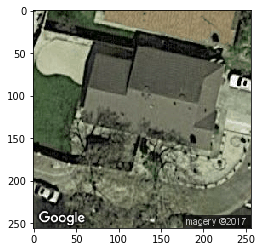

In [7]:
plt.imshow(test_image2)

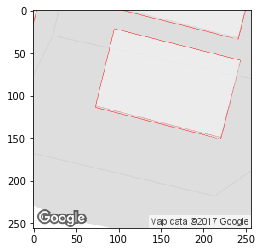

In [114]:
plt.imshow(test_image1)

In [17]:
test_image1[0][0]

array([236, 236, 236], dtype=uint8)

In [15]:
test_image1.shape

(256, 256, 3)

In [36]:
test_image1[0]

array([[236, 236, 236],
       [236, 236, 236],
       [236, 236, 236],
       [230, 183, 187],
       [233, 139, 139],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [214, 214, 214],
       [214, 214, 214],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222, 222],
       [222, 222

In [115]:
a = np.empty_like (test_image1)
a[:] = test_image1

In [116]:
for i in range(256):
    for j in range(256):
        if(a[i][j][0] != 236 and a[i][j][1] != 236 and a[i][j][2] != 236):
            a[i][j][0] = 0
            a[i][j][1] = 0
            a[i][j][2] = 0
        else:
            a[i][j][0] = 255
            a[i][j][1] = 255
            a[i][j][2] = 255

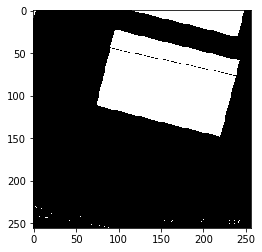

In [117]:
plt.imshow(a)

In [119]:
final_image = a.astype(np.uint8)

# Filling holes

In [120]:
import skimage.color as skc

In [121]:
grey_image = skc.rgb2gray(final_image)

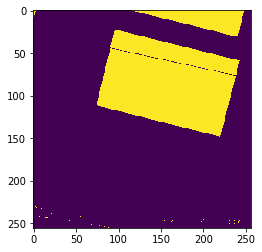

In [122]:
plt.imshow(grey_image)

In [126]:
fgi = (grey_image*255).astype(np.uint8)

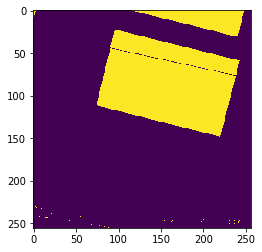

In [128]:
plt.imshow(fgi)

In [131]:
edges = canny(fgi)

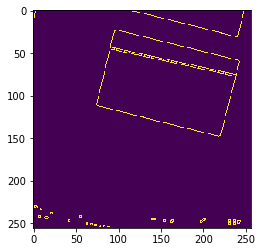

In [133]:
plt.imshow(edges)

In [134]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

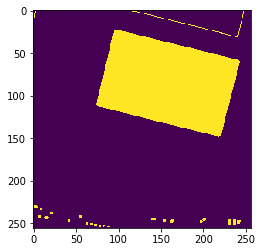

In [135]:
plt.imshow(fill_coins)

In [136]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)


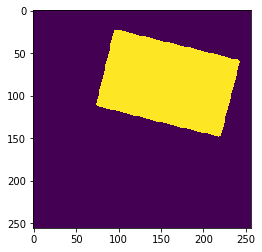

In [137]:
plt.imshow(coins_cleaned)

# Now the real thing!!

In [139]:
coins_cleaned.shape

(256, 256)

In [140]:
test_image2.shape

(256, 256, 3)

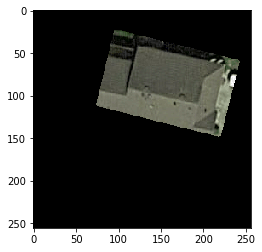

In [141]:
copy_main = np.empty_like (test_image2)
copy_main[:] = test_image2
for i in range(256):
    for j in range(256):
        if(not(coins_cleaned[i][j])):
            copy_main[i][j][0] = 0
            copy_main[i][j][1] = 0
            copy_main[i][j][2] = 0
plt.imshow(copy_main)